<a href="https://colab.research.google.com/github/ueki5/colaboratory/blob/main/playground-009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 必要ライブラリ・コマンドの導入
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
w = !apt install tree
print(w[-2])

tree is already the newest version (2.0.2-1).


In [ ]:
# import torch
# # レイヤー関数定義

# # 最初の線形関数
# # 784 入力数
# # 128 出力数
# l1 = torch.nn.Linear(784, 128)

# # ２番目の線形関数
# # 128 入力数
# #  10 出力数
# l2 = torch.nn.Linear(128, 10)

# # 活性化関数
# relu = torch.nn.ReLU(inplace=True)




In [ ]:
# # 入力テンソルから出力テンソルを計算

# # ダミー入力データを作成
# inputs = torch.randn(100, 784)

# # 中間テンソル1の計算
# m1 = l1(inputs)

# # 中間テンソル2の計算
# m2 = relu(m1)

# # 出力テンソルの計算
# outputs = l2(m2)

# # 入力テンソルと出力テンソルのshape確認
# print(f'inputs:{inputs.shape}')
# print(f'm1:{m1.shape}')
# print(f'm2:{m2.shape}')
# print(f'出力テンソル:{outputs.shape}')



In [ ]:
# #nn.Sequentialを使って、全体を合成関数として定義
# net2 = torch.nn.Sequential(
#     l1,
#     relu,
#     l2
# )

# output2 = net2(inputs)

# # 入力テンソルと出力テンソルのshape
# print(f'入力テンソル:{inputs.shape}')
# print(f'出力テンソル:{output2.shape}')


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

torch.manual_seed(123)
def calc_result(x):
  return x**2 + torch.randn(100,1)*0.1
x = torch.randn(100, 1)
y = calc_result(x)
# print(x)
# print(y)

x_train = x[  :50, :]
x_test  = x[50:  , :]
y_train = y[  :50, :]
y_test  = y[50:  , :]


In [ ]:
# レイヤー関数定義

# 最初の線形関数
# 1 入力数
# 1 出力数
l1 = torch.nn.Linear(1, 1)

# 活性化関数
relu = torch.nn.ReLU(inplace=True)

# ２番目の線形関数
# 1 入力数
# 1 出力数
l2 = torch.nn.Linear(1, 1)


In [ ]:
#nn.Sequentialを使って、全体を合成関数として定義
net = torch.nn.Sequential(
    l1,
    # relu,
    # l2,
)


# ダミー入力データを作成
inputs = torch.randn(100, 1)
output = net(inputs)

# 入力テンソルと出力テンソルのshape
print(f'入力テンソル:{inputs.shape}')
print(f'出力テンソル:{output.shape}')


入力テンソル:torch.Size([100, 1])
出力テンソル:torch.Size([100, 1])


In [ ]:
# 繰り返し回数
num_epochs = 500

# 学習率
lr = 0.001

# optimizerとしてSGD（確率的勾配降下法を指定する）
import torch.optim as optim
optimizer = optim.SGD([l1.weight, l1.bias], lr=lr, momentum=0.9)

# 記録用配列初期化
history = np.zeros((0, 2))

In [ ]:
# ループ処理
def mse(Yp, Y):
  loss = ((Yp - Y) ** 2).mean()
  return loss

for epoch in range(num_epochs):

  # 予測計算
  Yp = net(x_train)

  # 損失計算
  loss = mse(Yp, y_train)

  # 勾配計算
  loss.backward()

  # パラメータ修正
  optimizer.step()

  # 勾配値初期化
  optimizer.zero_grad()

  # 損失の記録
  if (epoch %10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))
    # print(f'epoch = {epoch}, loss = {loss:.4f}')


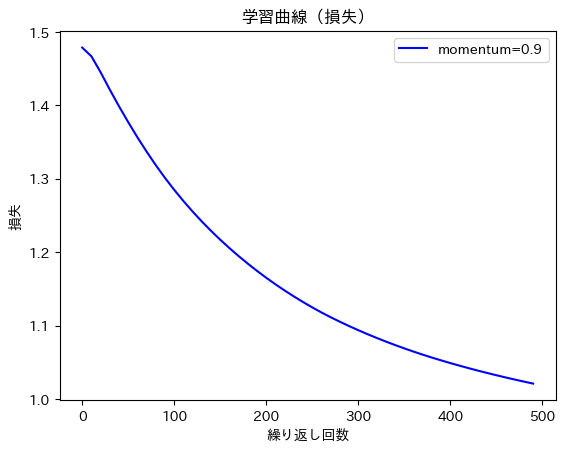

In [ ]:
# 学習曲線の表示（損失）
plt.plot(history[:, 0], history[:, 1], 'b', label='momentum=0.9')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.legend()
plt.title('学習曲線（損失）')
plt.show()

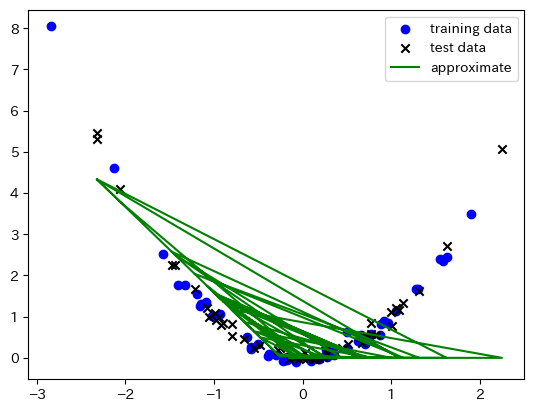

In [ ]:
plt.scatter(x_train.data, y_train.data, c='b', label='training data')
plt.scatter(x_test.data,  y_test.data,  c='k', label='test data', marker='x')
plt.plot(x_test.data, net(x_test).data, c='g', label='approximate')

plt.legend()
plt.show()
